### Linear Regression

   snowfall  closure
0         3        5
1         6       13
2         9       16
3        12       14
4        15       18
5        18       23
6        21       20
7        24       32
8        27       29
9        30       28


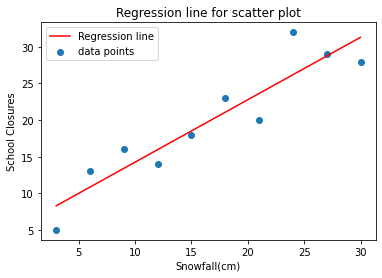

In [11]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataprep.eda import create_report
#LOAD DATA
data = pd.read_excel('regression.xlsx')
labels = ['snowfall','closure']
data.columns = labels
#data = pd.DataFrame(data, columns=labels)
data
#create_report(data).show()
x = data.snowfall.values
y = data.closure.values
print(data)
coefficients = np.polyfit(x,y,1)
poly = np.poly1d(coefficients)
regression_line = poly(x)
plt.scatter(x,y, label='data points')
plt.plot(x,regression_line,color='red', label='Regression line')
plt.xlabel('Snowfall(cm)')
plt.ylabel('School Closures')
plt.title('Regression line for scatter plot')
plt.legend()
plt.show()

### The Least Squares Method Equation
$$ slope = \frac {n\sum_{i=1}^n (x_i y_i) - \sum_{i=1}^n x_i \sum_{i=1}^n y_i} {n\sum_{i=1}^n (x^2)-\sum_{i=1}^n(x)^2} $$

$$ Intercept = \frac {\sum_{i=1}^n y_i - m \sum_{i=1}^n y_i} {n} $$

### Deviation method

$$ slope = \frac {\sum_{i=1}^n (x_i - x_{mean})(y_i-y_{mean})} {\sum_{i=1}^n (x_i - x_{mean})(x_i - x_{mean})} $$


**Where:**
* $ x_i $ = Values of x
* $ x_{mean} $ = Mean value of x values 
* $ y_i $ = Values of y 
* $ y_{mean} $ = Mean value of y values
* m = slope
* n = Number of observation points

In [7]:
#getting the mean of x and y
x_mean = np.mean(x)
y_mean = np.mean(y)
#array declaration
x_deviation = []
y_deviation = []
xy = []
xsquared = []
#loop to calculate deviation from mean of x
for value in x:
    deviation = value-x_mean
    x_deviation = np.append(x_deviation,deviation)
data['x_deviation'] = x_deviation
#loop to calculate deviation from mean of y
for value in y:
    deviation = value-y_mean
    y_deviation = np.append(y_deviation,deviation)
#Append new values to data
data['y_deviation'] = y_deviation

#loop to calculate product of the two deviations
length = len(x)
products =[]
x_squares =[]
for i in range(length):
    xsquared_value = data.loc[i,'snowfall'] * data.loc[i,'snowfall']
    xy_value = data.loc[i,'snowfall'] * data.loc[i,'closure']
    product = data.loc[i,'x_deviation'] * data.loc[i,'y_deviation']
    xsquared = np.append(xsquared,xsquared_value)
    xy = np.append(xy,xy_value)
    products = np.append(products,product)
data['products'] = products
data['xy'] = xy
data['x_squared'] = xsquared
#loop to calculate squares of the x_deviations
for i in range(length):
    x_square = data.loc[i,'x_deviation'] * data.loc[i,'x_deviation']
    x_squares = np.append(x_squares,x_square)
data['x_deviation_squared'] = x_squares
data


,snowfall,closure,x_deviation,y_deviation,products,xy,x_squared,x_deviation_squared
0,3,5,-13.5,-14.8,199.8,15.0,9.0,182.25
1,6,13,-10.5,-6.8,71.4,78.0,36.0,110.25
2,9,16,-7.5,-3.8,28.5,144.0,81.0,56.25
3,12,14,-4.5,-5.8,26.1,168.0,144.0,20.25
4,15,18,-1.5,-1.8,2.7,270.0,225.0,2.25
5,18,23,1.5,3.2,4.8,414.0,324.0,2.25
6,21,20,4.5,0.2,0.9,420.0,441.0,20.25
7,24,32,7.5,12.2,91.5,768.0,576.0,56.25
8,27,29,10.5,9.2,96.6,783.0,729.0,110.25
9,30,28,13.5,8.2,110.7,840.0,900.0,182.25


In [8]:
numerator = data.products.sum()
denominator = data.x_deviation_squared.sum()
sumx = data.snowfall.sum()
sumy = data.closure.sum()
sumxy = data.xy.sum()
sumxsquared = data.x_squared.sum()
#least squares method
slope1 = (length*sumxy - sumx*sumy)/(length*sumxsquared - sumx*sumx)
#the other method
slope = numerator/denominator
intercept = coefficients[1]
intercpt = (sumy - slope*sumx)/length
print('Intercept of regression line = ', round(intercept,3))
print('Intercpt2 of regression line = ', round(intercpt,3))
print('Slope of regression line = ', round(slope,3))
print('Second Slope of regression line = ', round(slope1,3))


Intercept of regression line =  5.733
Intercpt2 of regression line =  5.733
Slope of regression line =  0.853
Second Slope of regression line =  0.853
